In [1]:
%matplotlib inline
import pandas as pd #importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LinearRegression, Lasso, Ridge #importing Machine Learning models 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #importing Machine Learning model evaluation tools
from sklearn.metrics import mean_squared_error

folder_path = 'C:\\Users\Shams\\AppData\\Roaming\\Microsoft\\Windows\\Start Menu\\Programs\\Python 3.7\\Data\\Gapminder\\kaggle\\input'
fileName = 'gapminder.csv'
gapminder_df = pd.read_csv(os.path.join(folder_path, fileName)) #gathering csv data

In [2]:
gapminder_df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


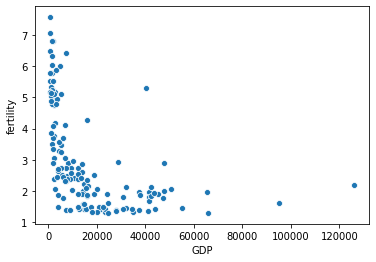

In [3]:
chart1 = sns.scatterplot(data = gapminder_df, x='GDP', y ='fertility') #some exploratory data analysis

[Text(0, 0, 'Middle East & North Africa'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'America'),
 Text(0, 0, 'Europe & Central Asia'),
 Text(0, 0, 'East Asia & Pacific'),
 Text(0, 0, 'South Asia')]

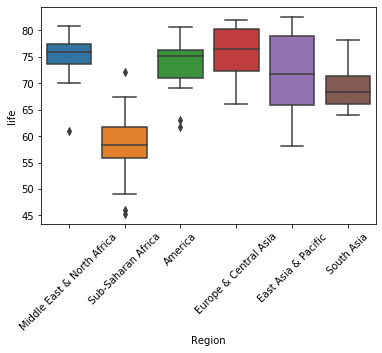

In [4]:
chart2 = sns.boxplot(data = gapminder_df, x='Region', y ='life')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)

[Text(0, 0, 'Middle East & North Africa'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'America'),
 Text(0, 0, 'Europe & Central Asia'),
 Text(0, 0, 'East Asia & Pacific'),
 Text(0, 0, 'South Asia')]

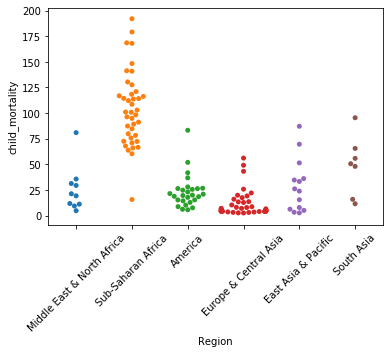

In [5]:
chart3 = sns.swarmplot(data = gapminder_df, x='Region', y ='child_mortality')
chart3.set_xticklabels(chart2.get_xticklabels(), rotation=45)

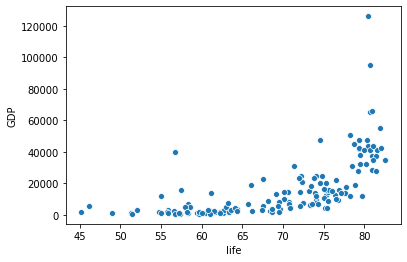

In [6]:
chart4 = sns.scatterplot(data = gapminder_df, x='life', y ='GDP')

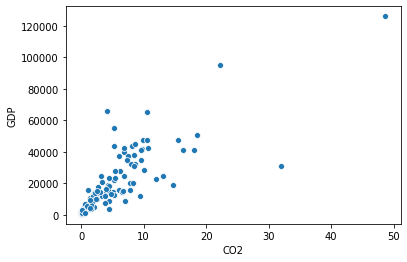

In [7]:
chart5 = sns.scatterplot(data = gapminder_df, x='CO2', y ='GDP')

As you can see, there are some conclusions we can make regarding the relations between GDP/capita and Fertility, Region and Life Expectancy / Child Mortality, and Life Expectancy and GDP/capita. What we will explore is if there is a way to predict the GDP/capita given the population, fertility, HIV, CO2, BMI_male, BMI_female, life, and child_mortality using supervised learning. We will be taking out Region from the data set, since it is categorical

In [8]:
test_data = gapminder_df.drop(['Region'], axis = 1) #data preprocessing 
X = test_data.drop(['GDP'], axis = 1)
y = test_data['GDP']

In [9]:
models = ['Linear Regression', 'Lasso Regression', ' Ridge Regression'] #models we will test
Pre_training_acc = [] #storage variables for the accuracy of the models before and after tuning for parameters
Post_training_acc = []
Pre_test_acc = []
Post_test_acc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 37) 

#random state = set seed so that train/test splots are deterministics (do not have different results every time you run the split)

In [10]:
#Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) #prediction by the regression model

Pre_training_acc.append(reg.score(X_train, y_train))

print('R^2: {}'.format(reg.score(X_test, y_test))) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

R^2: 0.48931102389682984
Root Mean Squared Error: 11258.407051979484


This R^2 of 0.489 may be biased on the choice on where the train and test data has been split. A procedure to account for this bias is to cross validated accross different possible "folds" or combinations of train / test splits, and find out the R^2 for each fold. Notice that we will be using 10 folds for this cross validation due to the fact our original test_size is 10% of the data, and thus there are 10 different combinations of the train / test split. (Note, this is only as a comparison, the number of folds is not dependant on the original test_size)

In [12]:
cv_scores = cross_val_score(reg, X, y, cv = 10)
print(cv_scores)
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Pre_test_acc.append(np.mean(cv_scores))

[ 0.74379089  0.75950977  0.45652969  0.82314146  0.34248563  0.80710416
  0.80366914  0.833419    0.69127079 -0.03979433]
Average 10-Fold CV Score: 0.6221126205277079


Now, with the cross validation, we find out the average 10 fold R^2 score is about 62.21%

In [13]:
def display_plot(cv_scores, cv_scores_std): #function to display range of alpha and Ridge model through mean & std graph
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

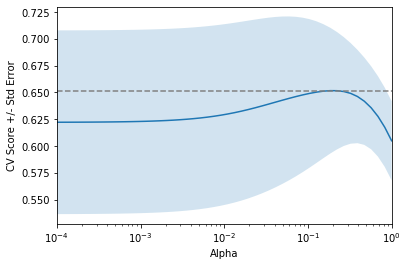

Optimal Ridge alpha value is: 0.6516717215382312


In [14]:
#Ridge Regression Model

alpha_space = np.logspace(-4, 0, 50) # Array .0001 to 1 to find the optimal value for alpha
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize = True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)
    
print("Optimal Ridge alpha value is: {}".format(np.max(ridge_scores)))

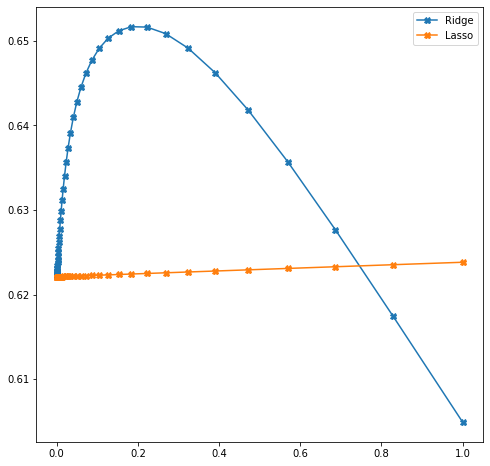

In [15]:
#Lasso Regression Model

lasso = Lasso(normalize = True)
lasso_scores = []
lasso_scores_std = []

for alpha in alpha_space:
    lasso.alpha = alpha
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=10)
    lasso_scores.append(np.mean(lasso_cv_scores)) 
    
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'X', label = "Ridge")
plt.plot(alpha_space, lasso_scores, marker = 'X', label = "Lasso")
plt.legend()
plt.show()

We can see that the Lasso Regression keeps increasing in score as the alpha goes up, which means it will not be an accurate in predicting the test data. On the other hand, Ridge Regression has a peak at approximately alpha = 0.2, so it looks promising

In [17]:
#choosing the correct hyperparameter for Lasso Regression

alpha_space2 = np.logspace(-8, 8, 100) 
params_grid = {'alpha': alpha_space2} 


lasso_model = GridSearchCV(lasso, params_grid, cv=10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 23.644894126454073}
0.6275579383971076


c:\users\shams\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
# Using value of alpha as 23.644894126454073 to get best accuracy for Lasso Regression

lasso = Lasso(alpha = 23.644894126454073, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Pre_training_acc.append(train_score)
Pre_test_acc.append(test_score)

0.7904378036878966
0.4948497042503135


In [20]:
#choosing the correct hyperparameter for Ridge Regression

ridge_model = GridSearchCV(ridge, params_grid, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.18738174228603868}
0.6346717621439648


c:\users\shams\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
# Using value of alpha as 0.18738174228603868 to get best accuracy for Ridge Regression

ridge = Ridge(alpha = 0.18738174228603868, normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Pre_training_acc.append(train_score)
Pre_test_acc.append(test_score)

0.7637211705483081
0.5062567556608759


In [22]:
coefficients = lasso.coef_
coefficients

array([-9.20957423e-07,  5.40079646e+02,  6.22482882e+02,  1.97257182e+03,
        0.00000000e+00, -7.54411977e+01,  1.04576736e+03,  2.85211808e+01])

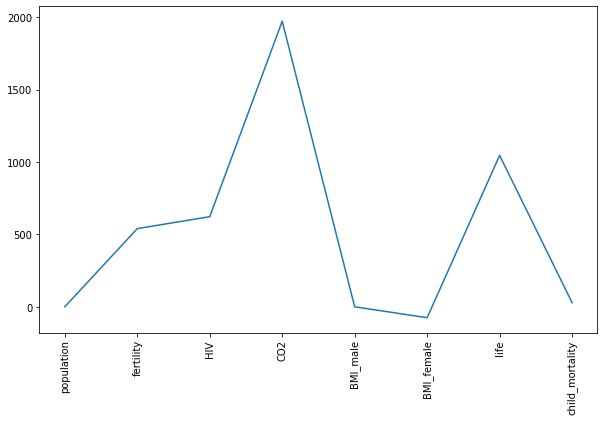

In [44]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(X_train.columns)), coefficients)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
plt.show()

After looking at above features, we get to know that prevalent features are: 'fertility', 'HIV', 'CO2' and'life' since the Lasso values for 'population', 'BMI_male', 'BMI_female' and 'child_mortality' are close to 0

In [23]:
X = test_data[['fertility', 'HIV', 'CO2', 'life']]
y = test_data['GDP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state = 37) 

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test) #prediction by the regression model

Post_training_acc.append(reg.score(X_train, y_train))

print('R^2: {}'.format(reg.score(X_test, y_test))) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))
cv_scores = cross_val_score(reg, X, y, cv = 10)
print(cv_scores)
print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

Post_test_acc.append(np.mean(cv_scores))

R^2: 0.5023204530476302
Root Mean Squared Error: 11114.082125858125
[0.7661175  0.77280057 0.46131961 0.81911731 0.62380118 0.80145819
 0.80524066 0.8476001  0.67754511 0.01302885]
Average 10-Fold CV Score: 0.6588029083847116


In [25]:
#choosing the correct hyperparameter for Lasso Regression

logreg_cv = GridSearchCV(lasso, params_grid, cv=10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 11.233240329780312}
0.6342119055997626


c:\users\shams\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
lasso = Lasso(alpha =  11.233240329780312, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Post_training_acc.append(train_score)
Post_test_acc.append(test_score)

0.7904998186106001
0.5001283589646544


In [28]:
ridge_model = GridSearchCV(ridge, params_grid, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)

{'alpha': 0.18738174228603868}
0.6528515622844613


c:\users\shams\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [29]:
ridge = Ridge(alpha = 0.12915496650148853, normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Post_training_acc.append(train_score)
Post_test_acc.append(test_score)

0.7745405770624937
0.48174064626106566


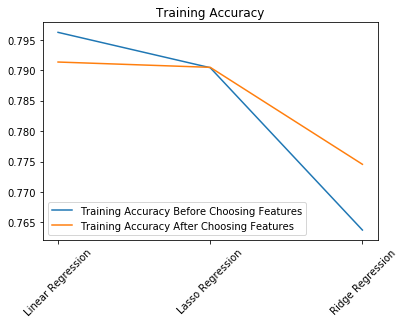

In [30]:
plt.plot(Pre_training_acc, label = 'Training Accuracy Before Choosing Features')
plt.plot(Post_training_acc, label = 'Training Accuracy After Choosing Features')
plt.xticks(range(len(models)), models, Rotation = 45)
plt.title('Training Accuracy')
plt.legend()
plt.show()

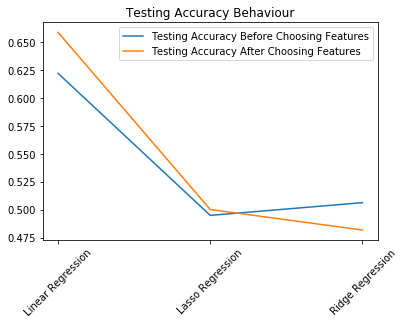

In [31]:
plt.plot(Pre_test_acc, label = 'Testing Accuracy Before Choosing Features')
plt.plot(Post_test_acc, label = 'Testing Accuracy After Choosing Features')
plt.xticks(range(len(models)), models, Rotation = 45)
plt.title('Testing Accuracy Behaviour')
plt.legend()
plt.show()